# Описание проекта

Вместе с отделом маркетинга крупного интернет-магазина был подготовлен список гипотез для увеличения выручки.

Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

--------------

## Часть 1. Приоритизация гипотез.
В файле **/datasets/hypothesis.csv** имеется 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами: **Reach, Impact, Confidence, Efforts**:

**Hypothesis** — краткое описание гипотезы;

**Reach** — охват пользователей по 10-балльной шкале;

**Impact** — влияние на пользователей по 10-балльной шкале;

**Confidence** — уверенность в гипотезе по 10-балльной шкале;

**Efforts** — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

In [1]:
import pandas as pd
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt
import warnings  
warnings.filterwarnings("ignore")  

In [2]:
df = pd.read_csv(r'C:\Users\Alex Kim\Desktop\Yandex Data Science Course\Спринт 6. Принятие решений в бизнесе на основе данных\hypothesis.csv')
df

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


### Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
#### ICE score = (Impact x Confidence) / Efforts

In [3]:
df['ICE'] = df['Impact'] * df['Confidence'] / df['Efforts']
df[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending = False).round(2)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.20
0,"Добавить два новых канала привлечения трафика,...",13.33
7,Добавить форму подписки на все основные страни...,11.20
6,Показать на главной странице баннеры с актуаль...,8.00
2,Добавить блоки рекомендаций товаров на сайт ин...,7.00
1,"Запустить собственную службу доставки, что сок...",2.00
5,"Добавить страницу отзывов клиентов о магазине,...",1.33
3,"Изменить структура категорий, что увеличит кон...",1.12
4,"Изменить цвет фона главной страницы, чтобы уве...",1.00


### Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
#### RICE score = (Reach x Impact x Confidence) / Efforts

In [4]:
df['RICE'] = df['Reach'] * df['Impact'] * df['Confidence'] / df['Efforts']
df.sort_values(by='RICE', ascending = False).round(2)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.00,3.0


In [5]:
print(df['Hypothesis'].unique())

['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей'
 'Запустить собственную службу доставки, что сократит срок доставки заказов'
 'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа'
 'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар'
 'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей'
 'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов'
 'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию'
 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'
 'Запустить акцию, дающую скидку на товар в день рождения']


### Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

Гипотеза с акцией в день рождения имеет очень ограниченный охват пользователей. По этой причине, при применении фреймворка RICE приоретизация данной гипотезы упала с 1-ой позиции на 5-ую. 

Противоположная ситуация с гипотезой про добавление формы подписки с целью сбора базы клиентов для email-рассылок. Здесь охват пользователей максимальный. Вкупе с высокими значениями влияния на пользователей, уверенности в гипотезе и средним значением затрат на проверку, данная гипотеза является самой приоритетной для проверки

------

## Часть 2. Анализ A/B-теста
Результаты проведенного A/B-теста описаны в файлах **/datasets/orders.csv** и **/datasets/visitors.csv**.

### Описание данных:

Файл /datasets/orders.csv.: 

**transactionId** — идентификатор заказа;

**visitorId** — идентификатор пользователя, совершившего заказ;

**date** — дата, когда был совершён заказ;

**revenue** — выручка заказа;

**group** — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv.:

**date** — дата;

**group** — группа A/B-теста;

**visitors** — количество пользователей в указанную дату в указанной группе A/B-теста

In [6]:
orders = pd.read_csv(r'C:\Users\Alex Kim\Desktop\Yandex Data Science Course\Спринт 6. Принятие решений в бизнесе на основе данных\orders.csv')
visitors = pd.read_csv(r'C:\Users\Alex Kim\Desktop\Yandex Data Science Course\Спринт 6. Принятие решений в бизнесе на основе данных\visitors.csv')

In [7]:
orders.head() #в датафрейме могут содержаться пользователи, которые по ошибке относятся как к группе A, так и к группе В. 
              #найдем и удалим эти значения 

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [8]:
orders.info() #неверный формат столбца 'date'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [9]:
groupA = orders[orders['group'] == 'A']
groupB = orders[orders['group'] == 'B']


In [10]:
groupA['visitorId'].isin(groupB['visitorId']) #замечаем True, т.е. такие пользователи действительно имеются. 

2        True
7       False
8       False
10      False
12      False
        ...  
1187    False
1188    False
1193    False
1194    False
1195     True
Name: visitorId, Length: 557, dtype: bool

In [11]:
indexA = groupA['visitorId'].isin(groupB['visitorId'])[groupA['visitorId'].isin(groupB['visitorId'])].index 
indexA
#здесь все индексы датафрейма groupA, которые дублируются и в датафрейме groupВ

Int64Index([   2,   26,   29,   33,   41,  114,  117,  118,  129,  133,  134,
             159,  179,  187,  197,  200,  219,  225,  227,  230,  249,  253,
             256,  265,  269,  279,  304,  325,  370,  375,  390,  430,  450,
             453,  456,  497,  525,  536,  548,  578,  588,  590,  605,  609,
             611,  627,  662,  672,  676,  677,  687,  698,  703,  716,  727,
             730,  739,  767,  782,  809,  823,  829,  842,  844,  858,  879,
             901,  914,  970, 1008, 1013, 1015, 1018, 1029, 1035, 1044, 1062,
            1091, 1093, 1097, 1098, 1102, 1156, 1162, 1167, 1173, 1178, 1183,
            1195],
           dtype='int64')

In [12]:
double_agents = groupA.loc[indexA]['visitorId'].unique()
double_agents
# здесь содержаться все уникальные Id пользователей, которые в датафрейме orders относятся и к группе А, и к группе В

array([4069496402,  199603092, 3803269165, 2378935119,  237748145,
       4256040402, 2038680547, 1738359350, 2458001652, 3891541246,
       2716752286, 3656415546, 2686716486, 2954449915, 2927087541,
       3234906277,  457167155, 2579882178, 3957174400, 1648269707,
       2780786433,  818047933, 2044997962, 1959144690, 3202540741,
       1333886533,  351125977, 3951559397,  393266494, 3984495233,
       4120364173, 4266935830, 1230306981, 1294878855, 1614305549,
          8300375,  477780734, 1668030113, 3717692402, 3766097110,
       3941795274,  471551937, 1316129916, 1801183820, 1602967004,
       2587333274, 2600415354,  232979603, 3972127743, 1404934699,
        276558944, 3062433592, 2654030115, 3963646447, 4186807279,
       2712142231, 2949041841,  963407295], dtype=int64)

In [13]:
orders[orders['visitorId'].isin(double_agents)]

,transactionId,visitorId,date,revenue,group
2,2961555356,4069496402,2019-08-15,400,A
20,2904772834,963407295,2019-08-15,300,B
23,4252514150,351125977,2019-08-15,15185,B
24,1162046357,3234906277,2019-08-15,7555,B
26,2223239646,199603092,2019-08-15,3488,A
...,...,...,...,...,...
1182,2682156369,1668030113,2019-08-14,1290,B
1183,1458356232,963407295,2019-08-14,4940,A
1184,1329499668,2949041841,2019-08-14,10380,B
1189,4082620617,393266494,2019-08-14,31550,B


In [14]:
print('Количество пользователей, оказавшихся в обеих группах:', 
      orders[orders['visitorId'].isin(double_agents)]['visitorId'].nunique())     
print('Доля таких пользователей от общего числа пользователей: {:.2%}'
      .format(orders[orders['visitorId'].isin(double_agents)]['visitorId'].nunique() / orders['visitorId'].nunique()))

Количество пользователей, оказавшихся в обеих группах: 58
Доля таких пользователей от общего числа пользователей: 5.63%


In [15]:
print('Количество заказов, совершенных пользователями, оказавшихся в обеих группах:', 
      len(orders[orders['visitorId'].isin(double_agents)]))
print('Доля заказов от этих пользователей в общем числе заказов: {:.2%}'
      .format(len(orders[orders['visitorId'].isin(double_agents)]) / len(orders)))

Количество заказов, совершенных пользователями, оказавшихся в обеих группах: 181
Доля заказов от этих пользователей в общем числе заказов: 15.12%


In [16]:
print('Выручка от пользователей, оказавшихся в обеих группах:', 
      orders[orders['visitorId'].isin(double_agents)]['revenue'].sum())     
print('Доля выручки таких пользователей от общей выручки: {:.2%}'
      .format(orders[orders['visitorId'].isin(double_agents)]['revenue'].sum() / orders['revenue'].sum()))     

Выручка от пользователей, оказавшихся в обеих группах: 1558935
Доля выручки таких пользователей от общей выручки: 15.60%


In [17]:
orders = orders[~orders['visitorId'].isin(double_agents)].reset_index().drop('index', axis=1) 
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,3797467345,1196621759,2019-08-15,9759,B
3,2282983706,2322279887,2019-08-15,2308,B
4,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1011,3592955527,608641596,2019-08-14,16490,B
1012,2662137336,3733762160,2019-08-14,6490,B
1013,2203539145,370388673,2019-08-14,3190,A
1014,1807773912,573423106,2019-08-14,10550,A


In [18]:
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
orders.dtypes

transactionId             int64
visitorId                 int64
date             datetime64[ns]
revenue                   int64
group                    object
dtype: object

In [19]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [20]:
visitors.info()  #неверный формат столбца 'date'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [21]:
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')
visitors.dtypes

date        datetime64[ns]
group               object
visitors             int64
dtype: object

In [22]:
visitors['visitors'].describe() #аномальные значения отсутствуют 

count     62.000000
mean     607.290323
std      114.400560
min      361.000000
25%      534.000000
50%      624.500000
75%      710.500000
max      770.000000
Name: visitors, dtype: float64

In [23]:
orders['revenue'].describe().apply(lambda x: format(x, 'f')) #заметны аномальные значения, удалять их пока не будем, 
                                                             #т.к. сравним результаты A/B теста с их учетом и без.

count       1016.000000
mean        8300.814961
std        42121.991672
min           50.000000
25%         1190.000000
50%         2955.000000
75%         8134.250000
max      1294500.000000
Name: revenue, dtype: object

In [24]:
print(orders.duplicated().sum())
print(visitors.duplicated().sum()) #дубликаты отсутствуют в обеих таблицах. 

0
0



Вначале были найдены пользователи, которые относятся и к группе А, и к группе В. Таких пользователей оказалось 5% от общего числа пользователей, но при этом доля заказов и выручки, приходящаяся на них, составляет 15%, что говорит о весомом вкладе этих пользователей в результаты А/В теста. Поэтому данные пользователи были удалены. 

Далее были исправлены типы данных в таблицах, а также проверены некоторые столбцы на наличие аномальных значений. Дубликатов в таблицах не оказалось.

### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [25]:
datesGroups = orders[['date', 'group']].drop_duplicates().sort_values(by='date')
datesGroups

,date,group
45,2019-08-01,A
54,2019-08-01,B
149,2019-08-02,A
147,2019-08-02,B
328,2019-08-03,B
...,...,...
456,2019-08-29,B
645,2019-08-30,A
589,2019-08-30,B
794,2019-08-31,B


In [26]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 
      'group' : 'max', 
      'transactionId' : 'nunique', 
      'visitorId' : 'nunique', 
      'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

ordersAggregated

,date,group,transactionId,visitorId,revenue
45,2019-08-01,A,23,19,142779
54,2019-08-01,B,17,17,59758
149,2019-08-02,A,42,36,234381
147,2019-08-02,B,40,39,221801
245,2019-08-03,A,66,60,346854
...,...,...,...,...,...
456,2019-08-29,B,510,490,4746610
645,2019-08-30,A,460,437,3311413
589,2019-08-30,B,531,511,4955833
820,2019-08-31,A,468,445,3364656


In [27]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
.agg({'date' : 'max', 
      'group' : 'max', 
      'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated

,date,group,visitors
45,2019-08-01,A,719
54,2019-08-01,B,713
149,2019-08-02,A,1338
147,2019-08-02,B,1294
245,2019-08-03,A,1845
...,...,...,...
456,2019-08-29,B,17708
645,2019-08-30,A,18037
589,2019-08-30,B,18198
820,2019-08-31,A,18736


In [28]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData

,date,group,transactionId,visitorId,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845
...,...,...,...,...,...,...
57,2019-08-29,B,510,490,4746610,17708
58,2019-08-30,A,460,437,3311413,18037
59,2019-08-30,B,531,511,4955833,18198
60,2019-08-31,A,468,445,3364656,18736


In [29]:
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845
...,...,...,...,...,...,...
57,2019-08-29,B,510,490,4746610,17708
58,2019-08-30,A,460,437,3311413,18037
59,2019-08-30,B,531,511,4955833,18198
60,2019-08-31,A,468,445,3364656,18736


In [30]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders', 'visitors']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders', 'visitors']]

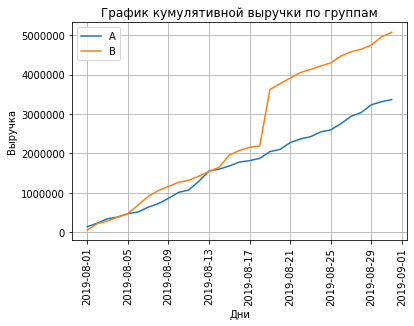

In [31]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График кумулятивной выручки по группам')
plt.ylabel('Выручка')
plt.xlabel('Дни')
plt.legend()
plt.grid()
plt.xticks(rotation='vertical')
plt.show()

После 17-го августа наблюдается резкий скачок кумулятивной выручки в группе В. Скорее всего выброс. Несмотря на резкий рост, кажется, что группа В все равно имеет выше выручку по сравнению с группой А на протяжении всего периода тестирования. 

### Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

(array([737272., 737276., 737280., 737284., 737288., 737292., 737296.,
        737300., 737303.]),
 <a list of 9 Text xticklabel objects>)

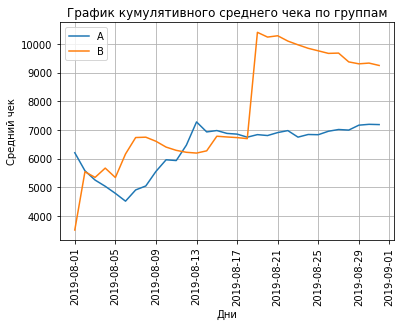

In [32]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.ylabel('Средний чек')
plt.xlabel('Дни')
plt.legend()
plt.grid()
plt.xticks(rotation='vertical')

Тот же самый выброс повлиял и на значение среднего чека. Однако здесь он уже не даёт понять в какой группе средний чек всё-таки выше.

### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.


In [33]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeRevenue.head()

,date,revenueA,ordersA,visitorsA,revenueB,ordersB,visitorsB
0,2019-08-01,142779,23,719,59758,17,713
1,2019-08-02,234381,42,1338,221801,40,1294
2,2019-08-03,346854,66,1845,288850,54,1803
3,2019-08-04,388030,77,2562,385740,68,2573
4,2019-08-05,474413,99,3318,475648,89,3280


(array([737272., 737276., 737280., 737284., 737288., 737292., 737296.,
        737300., 737303.]),
 <a list of 9 Text xticklabel objects>)

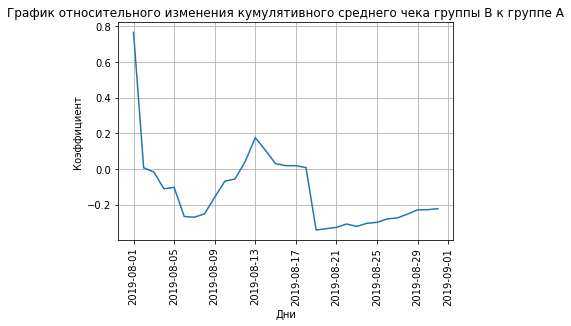

In [34]:
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueA'] / mergedCumulativeRevenue['ordersA']) / 
         (mergedCumulativeRevenue['revenueB'] / mergedCumulativeRevenue['ordersB']) - 1)
plt.title('График относительного изменения кумулятивного среднего чека группы В к группе А')
plt.ylabel('Коэффициент')
plt.xlabel('Дни')
plt.grid()
plt.xticks(rotation='vertical')

По графику утверждать во сколько раз средний чек одной из групп превышает другую невозможно по причине выбросов. 

Можно предположить, что между 9 и 13 августа был выброс в группе В (резкий рост на графике), а в период с 17 по 21 — выброс в группе А (резкое падение).

### Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.


(2, 4)

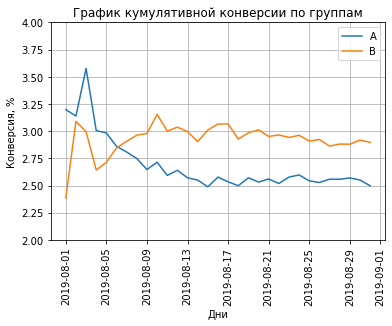

In [35]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['orders'] * 100 / cumulativeRevenueA['visitors'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['orders'] * 100 / cumulativeRevenueB['visitors'], label='B')
plt.title('График кумулятивной конверсии по группам')
plt.ylabel('Конверсия, %')
plt.xlabel('Дни')
plt.legend()
plt.grid()
plt.xticks(rotation='vertical')
plt.ylim(2,4)

Группа В показывает лучшую "конвертируемость" из посетителей в заказы.

### Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.

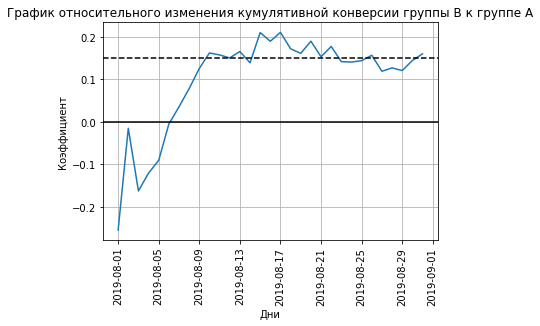

In [36]:
plt.plot(mergedCumulativeRevenue['date'], ((mergedCumulativeRevenue['ordersB'] / mergedCumulativeRevenue['visitorsB']) /
         (mergedCumulativeRevenue['ordersA'] / mergedCumulativeRevenue['visitorsA']) - 1))
plt.title('График относительного изменения кумулятивной конверсии группы В к группе А')
plt.ylabel('Коэффициент')
plt.xlabel('Дни')
plt.xticks(rotation='vertical')
plt.grid()
plt.axhline(y=0.15, color='black', linestyle='--')
plt.axhline(y=0, color='black', linestyle='-')

Наблюдаем ожидаемое превосходство группы В: конверсия группы В больше конверсии группы А примерно на 15%.

### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.


In [37]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})
ordersByUsers

,visitorId,transactionId
0,5114589,1
1,6958315,1
2,11685486,1
3,39475350,1
4,47206413,1
...,...,...
968,4259830713,1
969,4278982564,1
970,4279090005,1
971,4281247801,1


In [38]:
ordersByUsers['transactionId'].value_counts()

1    937
2     29
3      7
Name: transactionId, dtype: int64

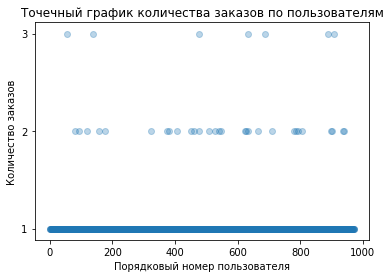

In [39]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['transactionId'], alpha=0.3)
plt.title('Точечный график количества заказов по пользователям')
plt.ylabel('Количество заказов')
plt.xlabel('Порядковый номер пользователя')
plt.yticks([1,2,3])
plt.show()

Большинство пользователей не совершают более двух заказов. 

### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [40]:
np.percentile(ordersByUsers['transactionId'], [95, 99])

array([1., 2.])

За аномальных пользователей будем считать тех пользователей, которые совершили два и более заказов. 

### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.


Text(0.5, 0, 'Порядковый номер заказа')

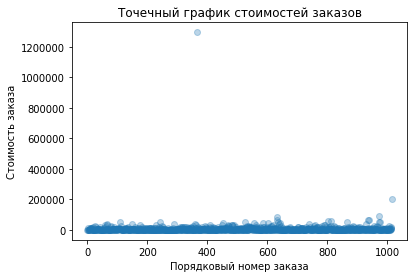

In [41]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'], alpha=0.3)
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость заказа')
plt.xlabel('Порядковый номер заказа')

### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [42]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

(0, 50000)

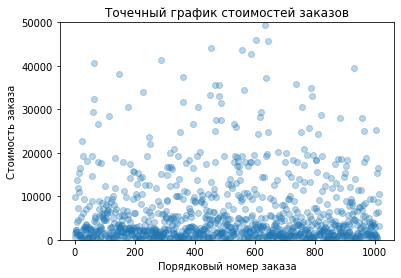

In [43]:
plt.scatter(x_values, orders['revenue'], alpha=0.3)
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость заказа')
plt.xlabel('Порядковый номер заказа')
plt.ylim(0, 50000)

За аномальные заказы примем заказы стоимостью более 26785 у.е.  

### Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.


In [44]:
mergedCumulativeRevenue.columns = ['date', 'cumulativeRevenueA', 'cumulativeOrdersA', 'cumulativeVisitorsA', 
                                   'cumulativeRevenueB', 'cumulativeOrdersB','cumulativeVisitorsB']
mergedCumulativeRevenue.head()

,date,cumulativeRevenueA,cumulativeOrdersA,cumulativeVisitorsA,cumulativeRevenueB,cumulativeOrdersB,cumulativeVisitorsB
0,2019-08-01,142779,23,719,59758,17,713
1,2019-08-02,234381,42,1338,221801,40,1294
2,2019-08-03,346854,66,1845,288850,54,1803
3,2019-08-04,388030,77,2562,385740,68,2573
4,2019-08-05,474413,99,3318,475648,89,3280


In [45]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : 'nunique', 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : 'nunique', 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

In [46]:
df = mergedCumulativeRevenue.merge(visitorsADaily, how='left', left_on='date', right_on='date').\
     merge(visitorsBDaily, how='left', left_on='date', right_on='date').\
    merge(ordersADaily, how='left', left_on='date', right_on='date').\
    merge(ordersBDaily, how='left', left_on='date', right_on='date')

df.head()

,date,cumulativeRevenueA,cumulativeOrdersA,cumulativeVisitorsA,cumulativeRevenueB,cumulativeOrdersB,cumulativeVisitorsB,visitorsPerDateA,visitorsPerDateB,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB
0,2019-08-01,142779,23,719,59758,17,713,719,713,23,142779,17,59758
1,2019-08-02,234381,42,1338,221801,40,1294,619,581,19,91602,23,162043
2,2019-08-03,346854,66,1845,288850,54,1803,507,509,24,112473,14,67049
3,2019-08-04,388030,77,2562,385740,68,2573,717,770,11,41176,14,96890
4,2019-08-05,474413,99,3318,475648,89,3280,756,707,22,86383,21,89908


In [47]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})
ordersByUsersB.columns = ['userId', 'orders']

In [48]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(df['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(df['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

In [49]:
#sampleA

In [50]:
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Относительное различие в конверсии между группами по "сырым" данным = {0:.2%}'.format(sampleB.mean()/sampleA.mean()-1))

p-value = 0.006
Относительное различие в конверсии между группами по "сырым" данным = 15.98%


Так как p-value < 0.05, то превосходство конверсии группы В над группой А в 16% статистически значимо. 

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.


In [51]:
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                                    orders[orders['group']=='B']['revenue'])[1]))
print('Относительное различие в среднем чеке заказа между группами по "сырым" данным = {0:.2%}'
      .format(orders[orders['group']=='B']['revenue'].mean() / orders[orders['group']=='A']['revenue'].mean() - 1))

p-value = 0.415
Относительное различие в среднем чеке заказа между группами по "сырым" данным = 28.66%


p-value > 0.05, то есть большое превосходство среднего чека группы В над группой А в 28.66% не является статистически значимым

### Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.


In [52]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 1]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 1]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 26785]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape)

487    113298937
937    148427295
792    204675465
33     249864742
586    358944393
dtype: int64
(86,)


In [53]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(df['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(df['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

In [54]:
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительное различие в конверсии между группами по "очищенным" данным = {0:.2%}'
      .format(sampleBFiltered.mean()/sampleAFiltered.mean() - 1))

p-value = 0.008
Относительное различие в конверсии между группами по "очищенным" данным = 17.39%


Различие в конверсии между группами по "очищенным" данным всё также статистически значимо  (p-value < 0.05). Само различие поднялось на 1.4% по сравнению с "сырыми" данными

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

In [55]:
print("p-value = {0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print('Относительное различие в среднем чеке заказа между группами по "очищенным" данным = {0:.2%}'.format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

p-value = 0.364
Относительное различие в среднем чеке заказа между группами по "очищенным" данным = -3.37%


Различие в среднем чеке заказа по "очищенным" данным статистически не значимо. Тем не менее, избавившись от выбросов в группе В, стало видно, что средний чек заказа группы В меньше среднего чека заказа группы А на 3.37% 

### Примите решение по результатам теста и объясните его. Варианты решений: 
 1. Остановить тест, зафиксировать победу одной из групп. 

 2. Остановить тест, зафиксировать отсутствие различий между группами. 

 3. Продолжить тест.
 
 ---------

Результаты А/В тестирования по "очищенным" данным: 

1. Конверсия группы В больше конверсии группы А на 17.4%. Результат статистически значим 

2. Средний чек заказа группы В меньше группы А на 3.37%. Результат статистически незначим. Таким образом, можно считать, что средний чек заказа обоих групп одинаковый. 

Таким образом, A/B тест показал, что добавление формы подписки на все основные страницы с целью собрать базу клиентов для email-рассылок, может повысить конверсию, при этом не навредив среднему чеку заказа.

**Решение**: остановить тест, зафиксировав победу группы В. 


## Общий вывод: 
К 9-ти имеющимся гипотезам были применены фреймворки **ICE** и **RICE** для приоритизации. 
Наиболее привлекательной гипотезой с точки зрения фреймворка **ICE** является запуск акции, дающей скидку на товар в день рождения. Данная гипотеза обладает очень ограниченным охватом пользователей, поэтому согласно фреймворку **RICE**, который и учитывает этот фактор, наиболее перспективной гипотезой является добавление формы подписки на все основные страницы, для сбора базы клиентов для email-рассылок. 

------------------
Далее была проведена предобработка данных с результатами А/В-теста: исправлен тип данных в таблицах. 
Также были обнаружены пользователи, которые относятся как к группе А, так и к группе В. Доля таких пользователей от общей массы составляет 5%, при этом на этих пользователей приходится 15% заказов и выручки. Для того, чтобы получить "чистые" результаты от А/В-теста, было принято решение не учитывать этих пользователей при анализе А/В-теста.

---------------------
Анализ А/В теста был проведен как с выбросами, так и по очищенным данным. 

Результаты анализа с учётом выбросов:

1) Кумулятивная выручка по группам - судя по графику, был резкий всплекс выручки в группе В примерно 19-го августа. Тем не менее, кумулятивная выручка группы В все равно превосходит кумулятивную выручку группы А. 

2) Кумулятивный средний чек по группам - тот же самый выброс повлиял и на этот график. Здесь однозначно зафиксировать у какой группы средний чек выше не представляется возможным. 

3) Относительное изменения среднего чека группы В к группе А - здесь можно склоняться к победе группы А, так как большую часть времени средний чек группы В был ниже среднего чека группы А на 20%. 

4) График кумулятивной конверсии и график относительного изменения кумулятивной конверсии фиксируют победу группы В. 
Конверсия группы В примерно была на 15% выше, чем у группы А (2.8% и 2.5% соответствено). 

----------------
Перед тем, как посчитать статистическую значимость в среднем чеке и конверсии между группами, были определены границы для определения аномальных пользователей и заказов. 

Так, к аномальным заказам были отнесены те заказы, стоимость которых составлял более 26 785 у.е. Аномальными пользователями считаются те пользователи, совершившие 2 и более заказа за период тестирования. 

В итоге, по сырым данным превосходство конверсии группы В над группой А в 16% является статистически значимым, а превосходство  среднего чека группы В над группой А в 28.66% не является статистически значимым.

По очищенным данным разница в конверсии между группами является статистически значимым. Само различие составило 17.39% 
Различие в среднем чеке было признано статистически незначимым. Однако здесь различие уже составило -3.37%, т.е. средний чек группы В меньше среднего чека группы А на 3.37%.


Так как по очищенным данным конверсия у группы В выше, чем у группы А, а различие в среднем чеке признано статистически не значимым, то было принято решение оставонить А/В-тест, признав победу группы В. 